In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers #as cvxopt_solvers
%matplotlib inline

In [5]:
x_neg = np.array([[4,2],[2,4],[4,4]])
y_neg = np.array([-1,-1,-1])

x_pos = np.array([[2,2]])
y_pos = np.array([1])

In [6]:
X = np.vstack((x_pos,-1*x_neg))
y = np.concatenate((y_pos,y_neg)).reshape(-1,1)
A = np.concatenate((X,y),axis = 1)
nagativeA = -A
print('Matrix A =\n',nagativeA)

Matrix A =
 [[-2 -2 -1]
 [ 4  2  1]
 [ 2  4  1]
 [ 4  4  1]]


In [7]:
D = cvxopt_matrix(np.diag([1,1,0]),tc='d')
d = cvxopt_matrix(np.array([0,0,0]),tc='d')
negA = cvxopt_matrix(np.array(nagativeA),tc='d')
neg1 = cvxopt_matrix(np.array([-1,-1,-1,-1]),tc='d') #number of row A

In [8]:
print('D=\n{}d=\n{}negA=\n{}neg1=\n{}'.format(D,d,negA,neg1))

D=
[ 1.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
d=
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
negA=
[-2.00e+00 -2.00e+00 -1.00e+00]
[ 4.00e+00  2.00e+00  1.00e+00]
[ 2.00e+00  4.00e+00  1.00e+00]
[ 4.00e+00  4.00e+00  1.00e+00]
neg1=
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]



In [9]:
sol = solvers.qp(D,d,negA,neg1)

     pcost       dcost       gap    pres   dres
 0:  1.6000e-01  3.0600e+00  8e+00  2e+00  1e+01
 1:  1.9930e+00  6.4388e-01  1e+00  8e-16  9e-15
 2:  1.0492e+00  9.6827e-01  8e-02  6e-16  2e-15
 3:  1.0005e+00  9.9962e-01  9e-04  0e+00  3e-15
 4:  1.0000e+00  1.0000e+00  9e-06  8e-16  3e-15
 5:  1.0000e+00  1.0000e+00  9e-08  0e+00  5e-15
Optimal solution found.


In [10]:
w = np.array([sol['x'][0],sol['x'][1]])
b = sol['x'][2]
print('w: {}\nb: {}'.format(w,b))

w: [-1.00000002 -1.00000002]
b: 5.000000121478417


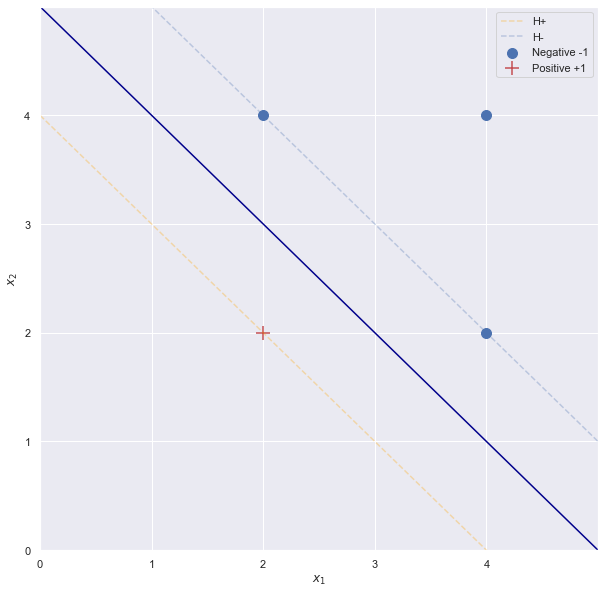

In [12]:
#H : <x,b>+b=0
Hx1 = np.linspace(0,5)
Hx2 = (-b-w[0]*Hx1)/w[1]

#H+ : <w,x>+b=1
Hpx1 = np.linspace(0,5)
Hpx2 = (1-b-w[0]*Hpx1)/w[1]

#H- : <w,x>+b=-1
Hnx1 = np.linspace(0,5)
Hnx2 = (-1-b-w[0]*Hnx1)/w[1]

fig = plt.figure(figsize = (10,10))
plt.scatter(x_neg[:,0], x_neg[:,1],s=100, marker = 'o', color = 'b', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1],s=200, marker = '+', color = 'r',label = 'Positive +1')

plt.plot(Hx1,Hx2,color = 'darkblue')
plt.plot(Hpx1,Hpx2, linestyle = '--', alpha = .3, color = 'orange',label = 'H+')
plt.plot(Hnx1,Hnx2, linestyle = '--', alpha = .3, color = 'b',label = 'H-')

plt.xlim(0,5)
plt.ylim(0,5)
plt.xticks(np.arange(0, 5, step=1))
plt.yticks(np.arange(0, 5, step=1))

#Labels and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()